<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Paper in Journal of Coastal and Hydraulic Structures
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Analyses described in section 3 of the paper

#### Packages

In [15]:
# General packages
import copy as cp
import pandas as pd
import numpy as np
import hvec_tide as tide
from matplotlib import pyplot as plt

# Project package


ImportError: cannot import name 'signals' from 'scipy' (c:\Users\Hessel Voortman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py)

#### Functions

In [2]:
def tide_component(t, T, A, phi = 0):
    """
    Tide component
    """
    omega = (2 * np.pi) / T
    return A * np.cos(omega * t + phi)


#### Create artifical tide data

In [3]:
comp = pd.DataFrame()

In [4]:
D = 8760 # hours # hours
t = np.linspace(0, D, (D * 6) + 1)
comp['t'] = t

In [5]:
# M2 tide
A = 0.5 # m
T = 12 + (25 / 60)
phi = np.pi
comp['M2'] = tide_component(t, T, A, phi)

In [6]:
# M4 tide
A = 0.3 # m
T = (12 + (25 / 60)) / 2
phi = 0
comp['M4'] = tide_component(t, T, A, phi)

In [7]:
# S2 tide
A = 0.1 # m
T = 12 # hours
phi = np.pi
comp['S2'] = tide_component(t, T, A, phi)

In [8]:
# Summed tides
comp['tide_1'] = comp['M2'] + comp['S2']
comp['tide_2'] = comp['tide_1'] + comp['M4']

In [9]:
# Split table
tide_1 = cp.copy(comp[['t', 'tide_1']])
tide_2 = cp.copy(comp[['t', 'tide_2']])

In [10]:
tide_1.rename(columns = {'tide_1': 'h'}, inplace = True)
tide_2.rename(columns = {'tide_2': 'h'}, inplace = True)

(0.0, 168.0)

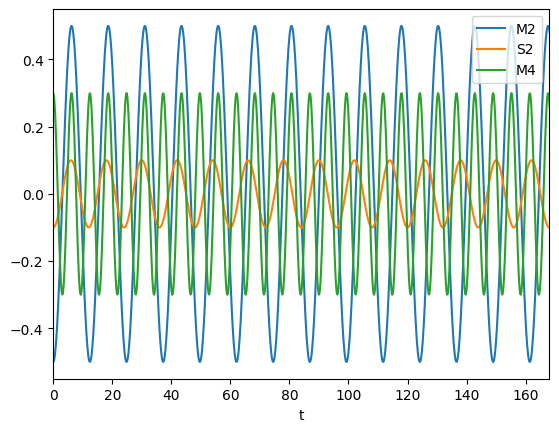

In [11]:
comp[['t', 'M2', 'S2', 'M4']].plot(x = 't', y = ['M2', 'S2', 'M4'])
plt.xlim(0, 7 * 24)

(0.0, 672.0)

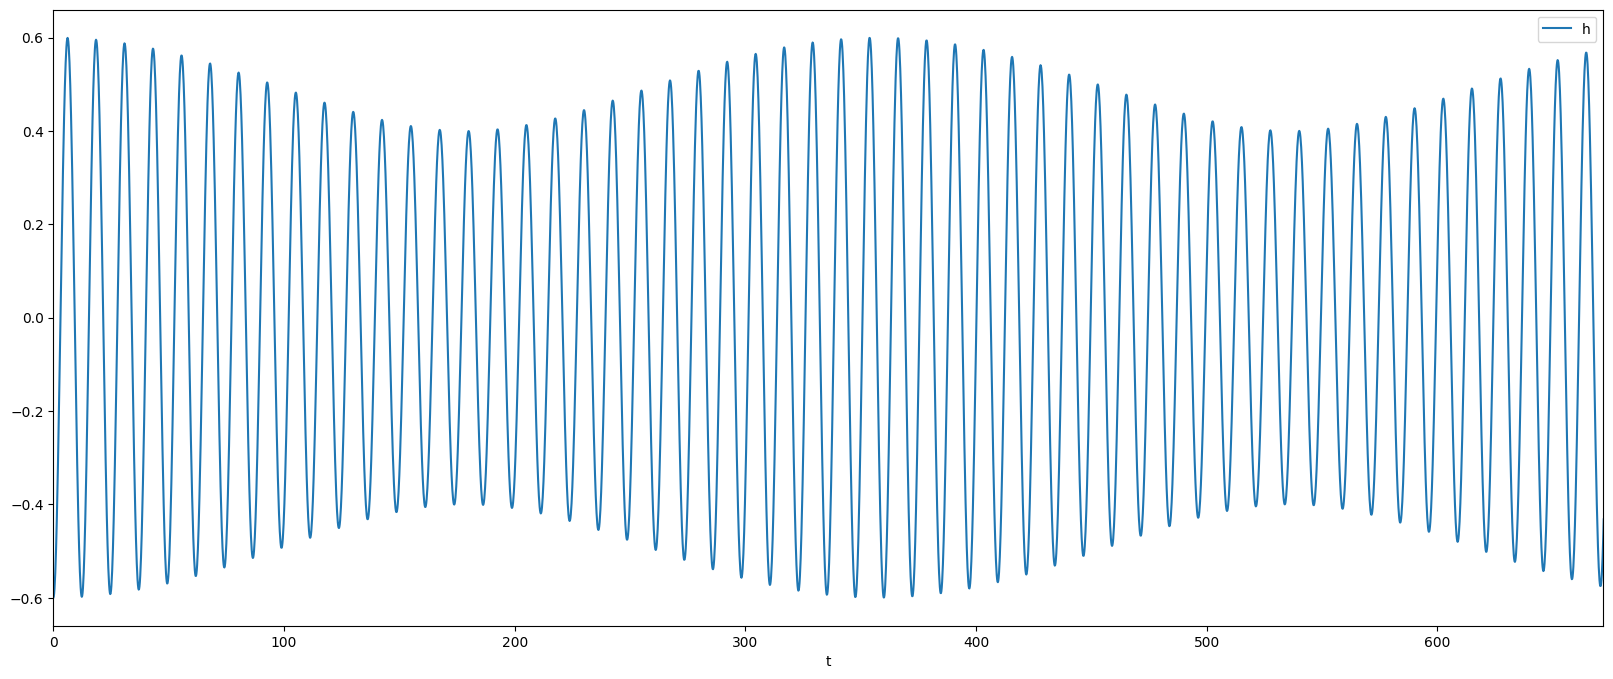

In [12]:
tide_1.plot(x = 't', y = 'h', figsize = (20, 8))
plt.xlim(0, 28*24)

(0.0, 720.0)

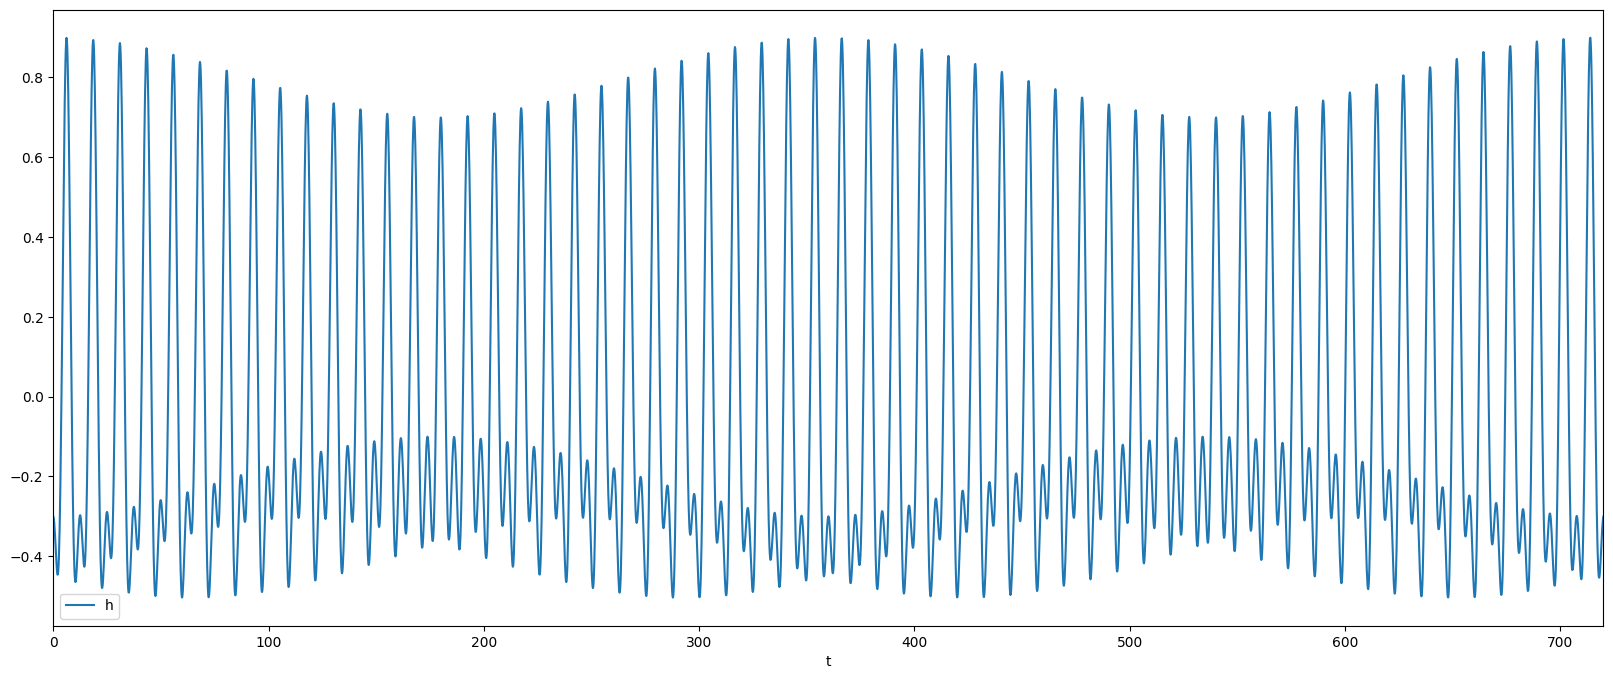

In [13]:
tide_2.plot(x = 't', y = 'h', figsize = (20, 8))
plt.xlim(0, 30*24)

#### Sampling high and low

In [14]:
tide_1.mean()

t    4.380000e+03
h    4.729947e-07
dtype: float64

#### End script
Prepared by HVEC lab, 2022